In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from wordcloud import WordCloud
import missingno as msno

### Visualization of the number of products created for each year

C:\Users\tiger\AppData\Local\Temp\ipykernel_23368\1121238165.py:1: DtypeWarning: Columns (0,11,20,21,22,23,26,36,43,46,47,48,49,50,51,71,72,73,74,75,77,78,79,81,82,83,84,85,86,87,88,89,91,92,93,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_csv/openfoodfacts_cleaned_V3.csv', sep=',', header=0)


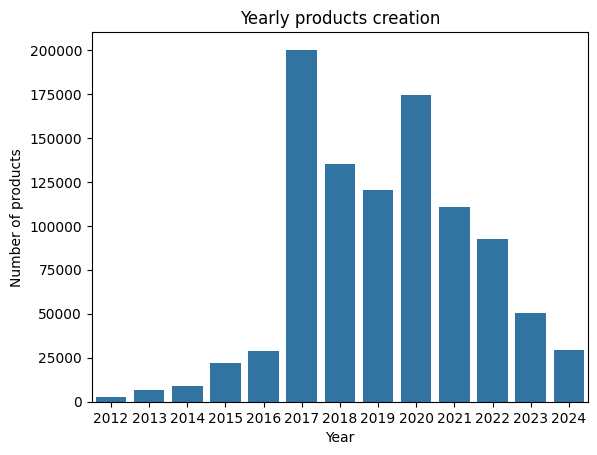

In [2]:
df = pd.read_csv('cleaned_csv/openfoodfacts_cleaned_V3.csv', sep=',', header=0)

df['created_datetime'] = pd.to_datetime(df['created_datetime'])

df['year'] = df['created_datetime'].dt.year

df['year'] = pd.to_numeric(df['year'])

yearly_creations = df.groupby('year').size().reset_index(name='creations')

sns.barplot(x='year', y='creations', data=yearly_creations)
plt.title('Yearly products creation')
plt.xlabel('Year')
plt.ylabel('Number of products')
plt.show()

### Repartition of products per country

C:\Users\tiger\AppData\Local\Temp\ipykernel_10524\131561376.py:1: DtypeWarning: Columns (0,11,20,21,22,23,26,36,43,46,47,48,49,50,51,71,72,73,74,75,77,78,79,81,82,83,84,85,86,87,88,89,91,92,93,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_csv/openfoodfacts_valid_countries.csv', sep=',', header=0)


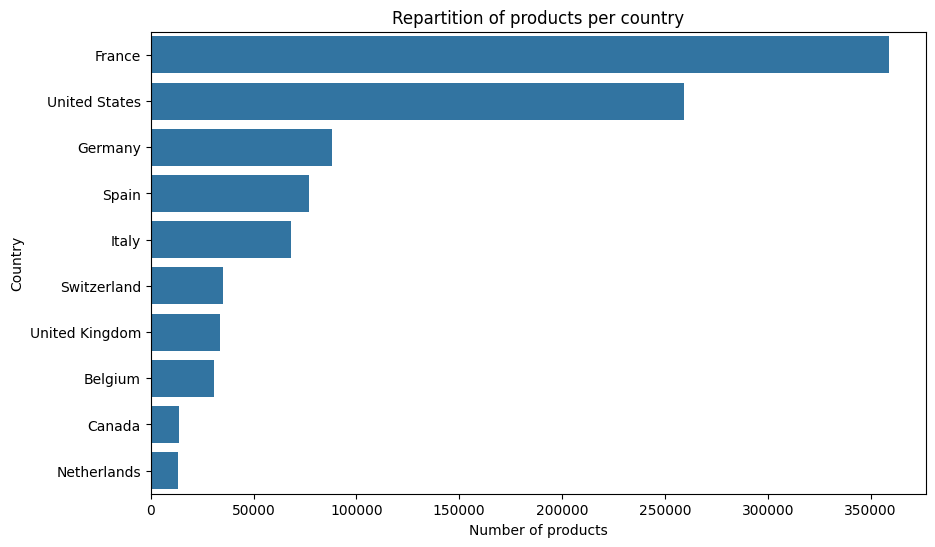

In [5]:
df = pd.read_csv('cleaned_csv/openfoodfacts_valid_countries.csv', sep=',', header=0)

country_counts = df['countries_en'].value_counts()
top_countries = country_counts.head(10)

#country_creations = df.groupby('countries_en').size().reset_index(name='creations')

plt.figure(figsize=(10, 6))
sns.barplot(y=top_countries.index, x=top_countries.values)
plt.title('Repartition of products per country')
plt.ylabel('Country')
plt.xlabel('Number of products')
plt.show()

### Wordcloud of columns 'categories_en', 'pnns_groups_1', 'pnns_groups_2', 'main_category_en'

In [4]:
df = pd.read_csv('cleaned_csv/openfoodfacts_4_columns.csv', sep=',', header=0)

C:\Users\tiger\AppData\Local\Temp\ipykernel_19540\2891597325.py:1: DtypeWarning: Columns (0,11,20,21,22,23,26,36,43,46,47,48,49,50,51,71,72,73,74,75,77,78,79,81,82,83,84,85,86,87,88,89,91,92,93,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_csv/openfoodfacts_4_columns.csv', sep=',', header=0)


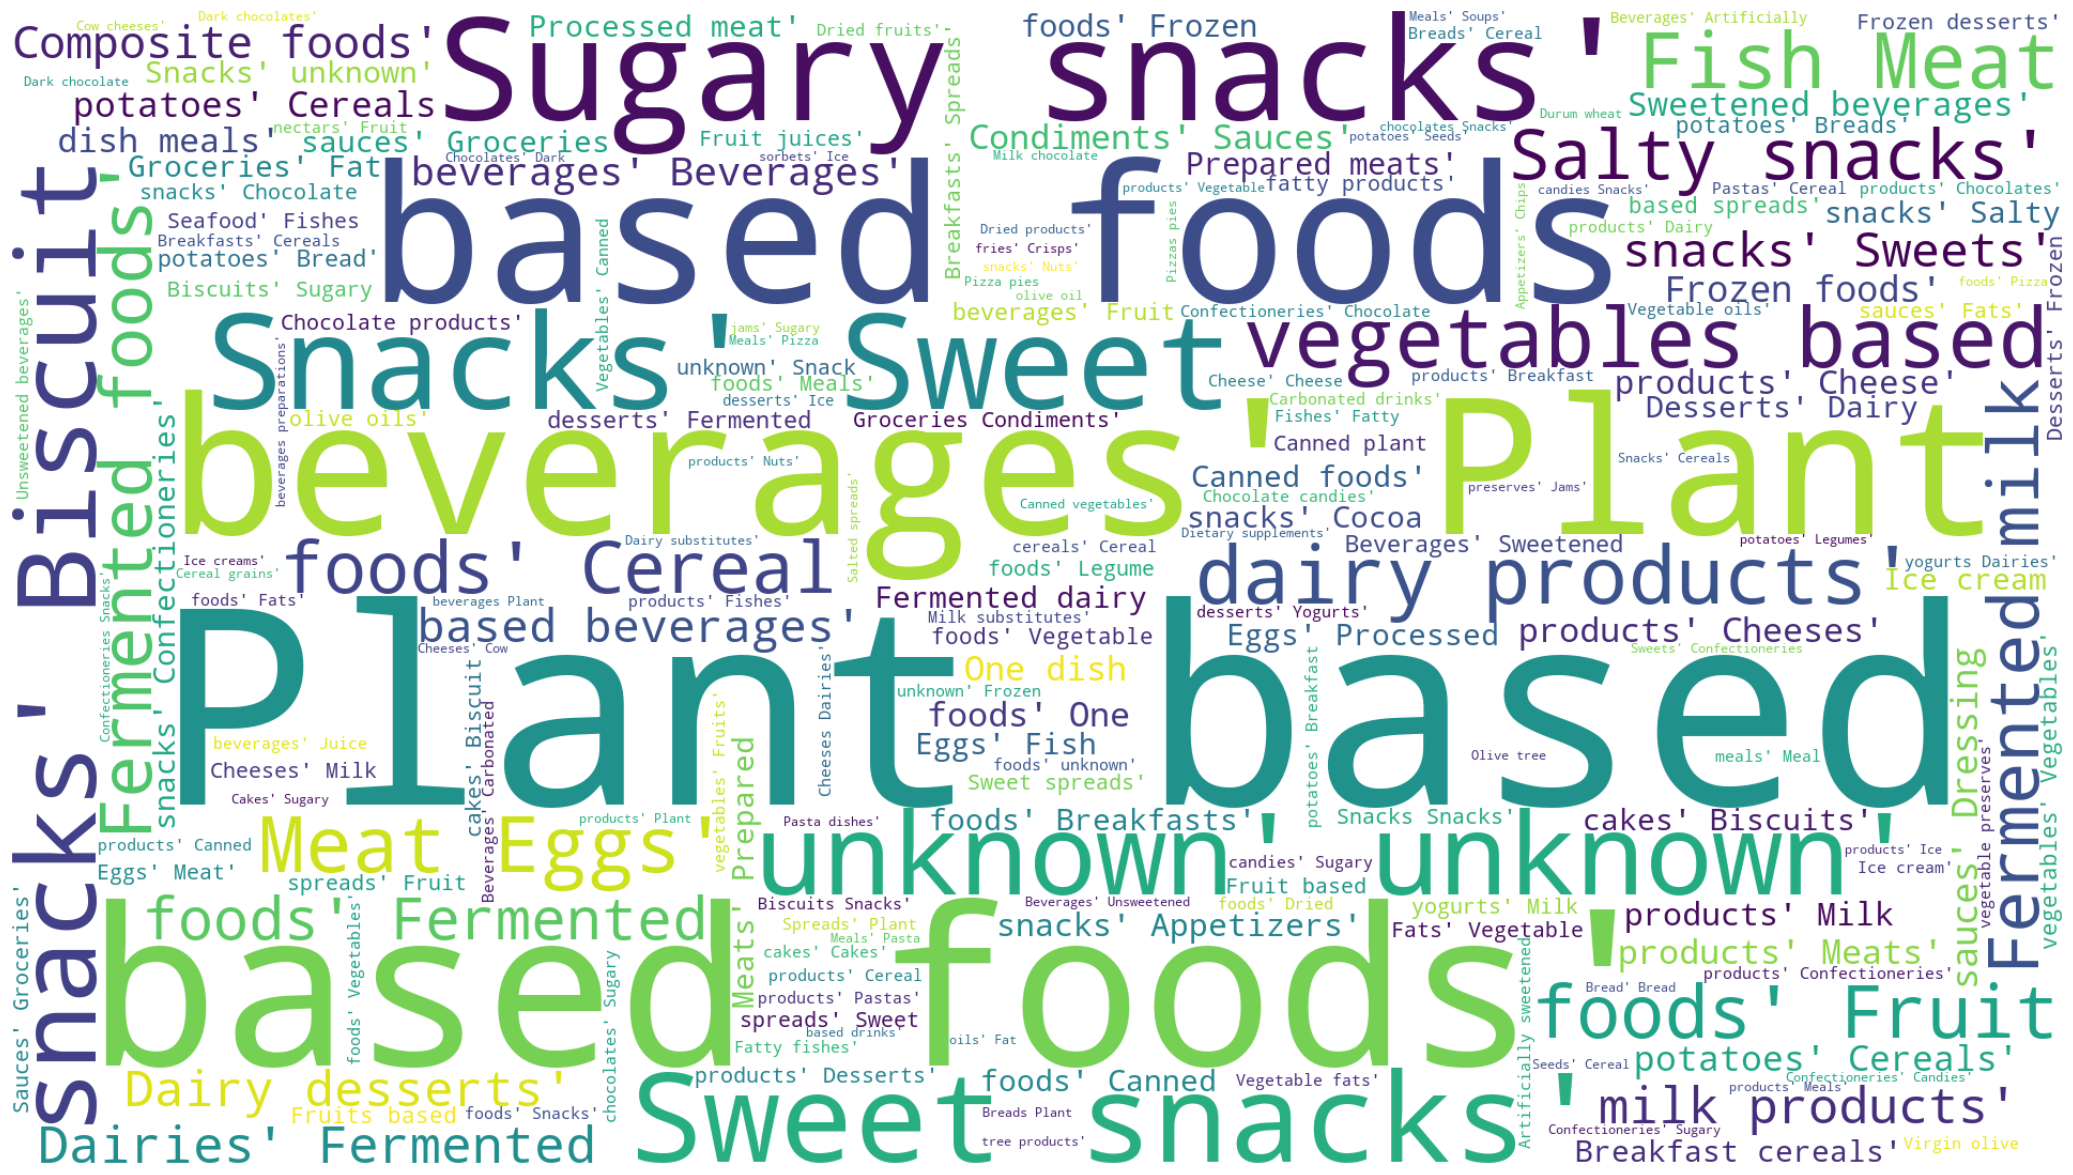

In [11]:
columns_list = ['categories_en', 'pnns_groups_1', 'pnns_groups_2', 'main_category_en']

text = [' '.join(row) for row in df[columns_list].values]

final_text = " ".join(text)

wordcloud = WordCloud(width=1920, height=1080, background_color='white').generate(final_text)

plt.figure(figsize=(30, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Missing values for _100g columns

In [7]:
df_nutrients = pd.read_csv('cleaned_csv/openfoodfacts_nutrients_only.csv', sep=',', header=0)

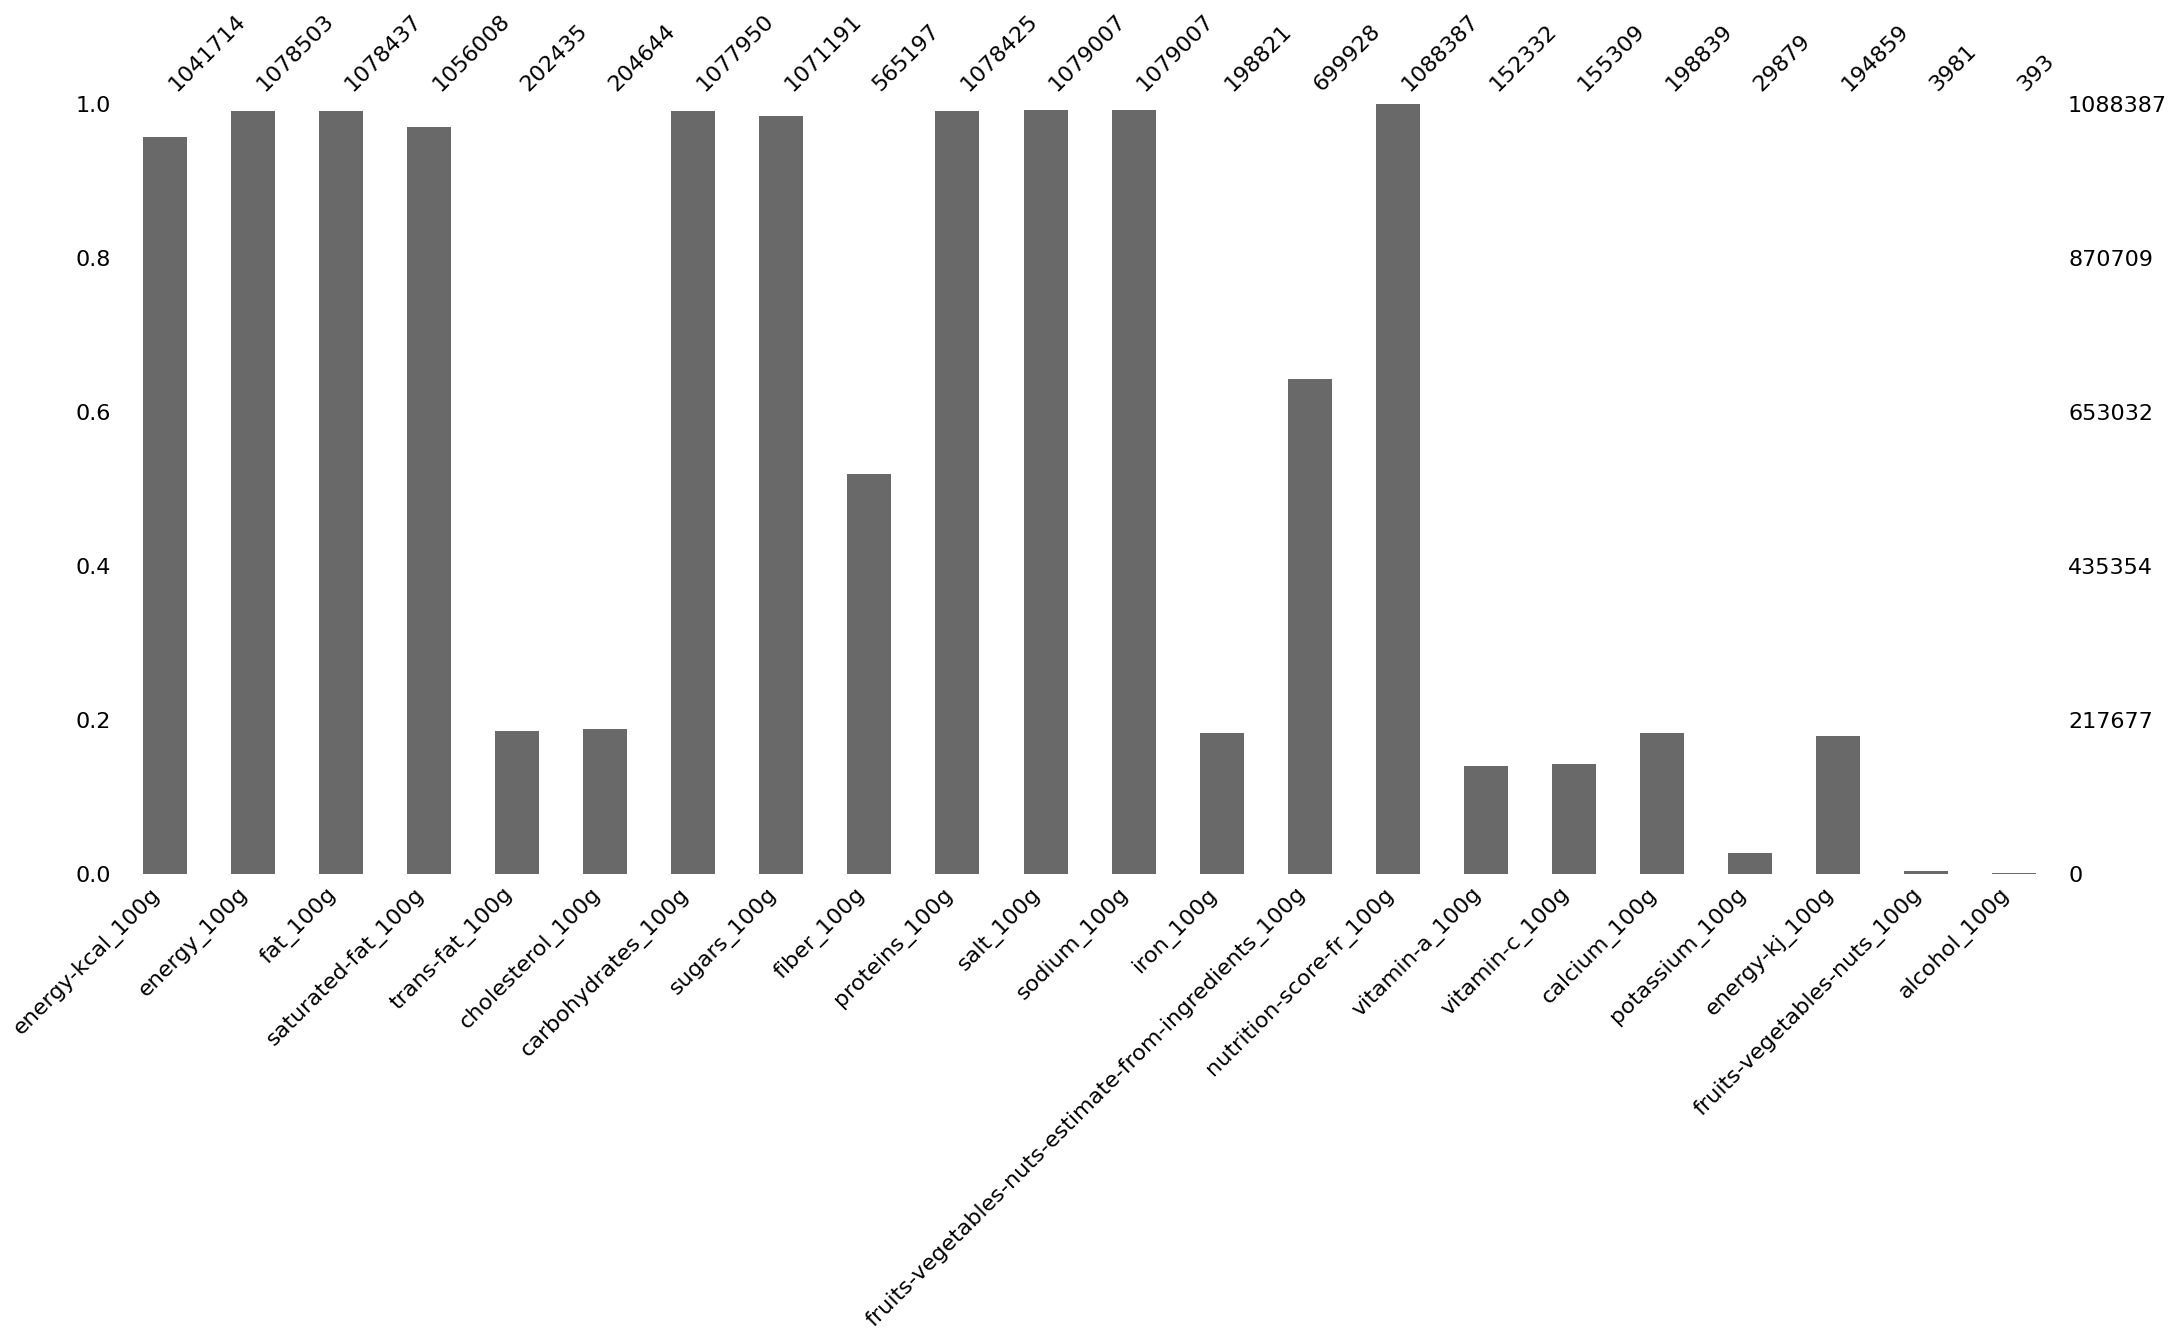

In [5]:
msno.bar(df_nutrients)
plt.show()

In [6]:
print(df_nutrients.head(10))

   energy-kcal_100g  energy_100g   fat_100g  saturated-fat_100g  \
0          406.0000       1700.0   6.600000            4.300000   
1          406.0000       1700.0   6.600000            4.300000   
2          578.0000       2401.0  40.900000           21.500000   
3          208.0000        840.0   0.000000            0.000000   
4           85.0000        356.0   2.400000            1.100000   
5           85.0000        356.0   2.400000            1.100000   
6          536.0715       2243.0  35.714284            8.928572   
7          442.0000       1852.0  22.000000            2.600000   
8          217.0000        908.0  13.000000            6.700000   
9          460.0000       1926.0  24.000000            6.000000   

   trans-fat_100g  cholesterol_100g  carbohydrates_100g  sugars_100g  \
0             NaN               NaN             6.70000      6.70000   
1             NaN               NaN             6.70000      6.70000   
2             NaN               NaN           

In [5]:
columns_to_drop = ['energy_100g', 'trans-fat_100g', 'cholesterol_100g', 'fiber_100g', 'iron_100g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g', 'nutrition-score-fr_100g', 'vitamin-a_100g', 'vitamin-c_100g', 'calcium_100g', 'potassium_100g', 'energy-kj_100g', 'fruits-vegetables-nuts_100g', 'alcohol_100g']

df_nutrients = df_nutrients.drop(columns_to_drop, axis=1)

,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,...,iron_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,potassium_100g,energy-kj_100g,fruits-vegetables-nuts_100g,alcohol_100g
count,1.041714e+06,1.078503e+06,1.078437e+06,1.056008e+06,202435.000000,204644.000000,1.077950e+06,1.071191e+06,565197.000000,1.078425e+06,...,198821.000000,699928.000000,1.088387e+06,152332.000000,155309.000000,198839.00000,29879.000000,1.948590e+05,3981.000000,393.000000
mean,9.599564e+10,9.272112e+10,1.524342e+01,5.642353e+00,0.043272,0.037495,2.864963e+01,1.343406e+01,3.161275,8.425878e+00,...,0.004329,19.193709,8.777178e+00,0.198009,0.011861,0.12949,0.472322,5.131916e+11,20.027703,0.003817
std,9.797736e+13,9.629180e+13,8.060494e+02,3.675275e+02,0.920710,1.078573,2.883778e+01,2.685256e+02,15.972200,7.573265e+01,...,0.174704,35.696858,8.863440e+00,19.615802,0.399471,2.87943,13.333184,2.265373e+14,34.944492,0.075665
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,-1.000000e+00,-1.000000,-8.330000e+00,...,0.000000,-65.887256,-2.000000e+01,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000
25%,1.070000e+02,4.480000e+02,1.000000e+00,1.500000e-01,0.000000,0.000000,4.000000e+00,8.000000e-01,0.000000,1.600000e+00,...,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.00000,0.083000,4.170000e+02,0.000000,0.000000
50%,2.650000e+02,1.102000e+03,7.450000e+00,2.000000e+00,0.000000,0.000000,1.643000e+01,3.900000e+00,1.700000,6.000000e+00,...,0.001020,0.725446,9.000000e+00,0.000000,0.000000,0.03500,0.167000,1.040000e+03,0.000000,0.000000
75%,4.020000e+02,1.682000e+03,2.200000e+01,7.400000e+00,0.000000,0.022000,5.357000e+01,1.820000e+01,3.900000,1.180000e+01,...,0.002400,23.692698,1.500000e+01,0.000107,0.003700,0.10000,0.289000,1.674000e+03,28.500000,0.000000
max,1.000000e+17,1.000000e+17,6.784540e+05,3.773720e+05,130.000000,116.915000,4.903000e+03,2.772230e+05,9888.000000,7.766700e+04,...,45.200000,13461.000000,4.000000e+01,4374.900000,84.000000,500.00000,1890.000000,1.000000e+17,100.000000,1.500000


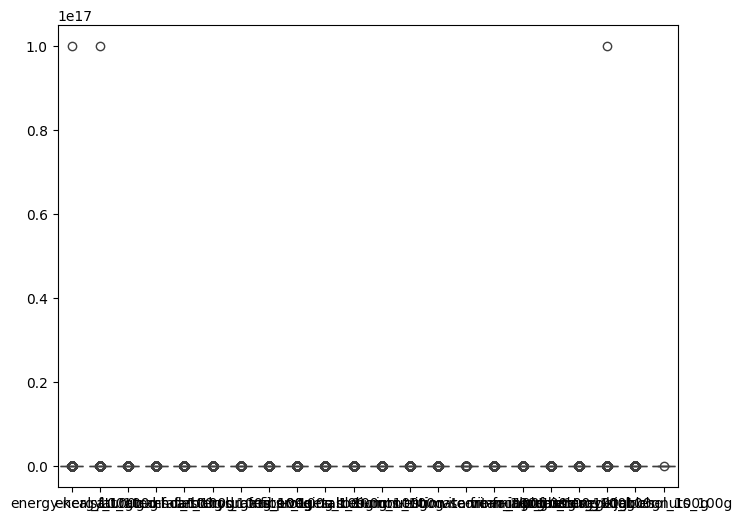

In [8]:
display(df_nutrients.describe())

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_nutrients)
plt.show()

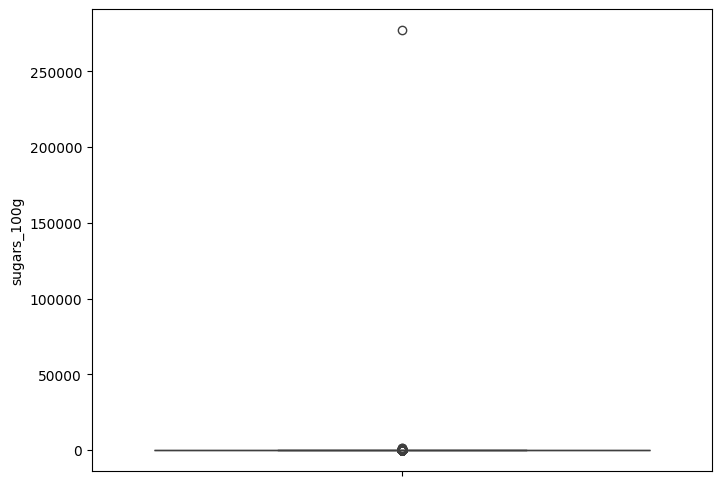

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_nutrients['sugars_100g'])
plt.show()

In [3]:
df = pd.read_csv('cleaned_csv/openfoodfacts_missing_values_100g.csv', sep=',', header=0)

C:\Users\tiger\AppData\Local\Temp\ipykernel_2872\2323060399.py:1: DtypeWarning: Columns (0,11,20,21,22,23,26,36,43,46,47,48,49,50,51,60,61,62,63,64,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_csv/openfoodfacts_missing_values_100g.csv', sep=',', header=0)


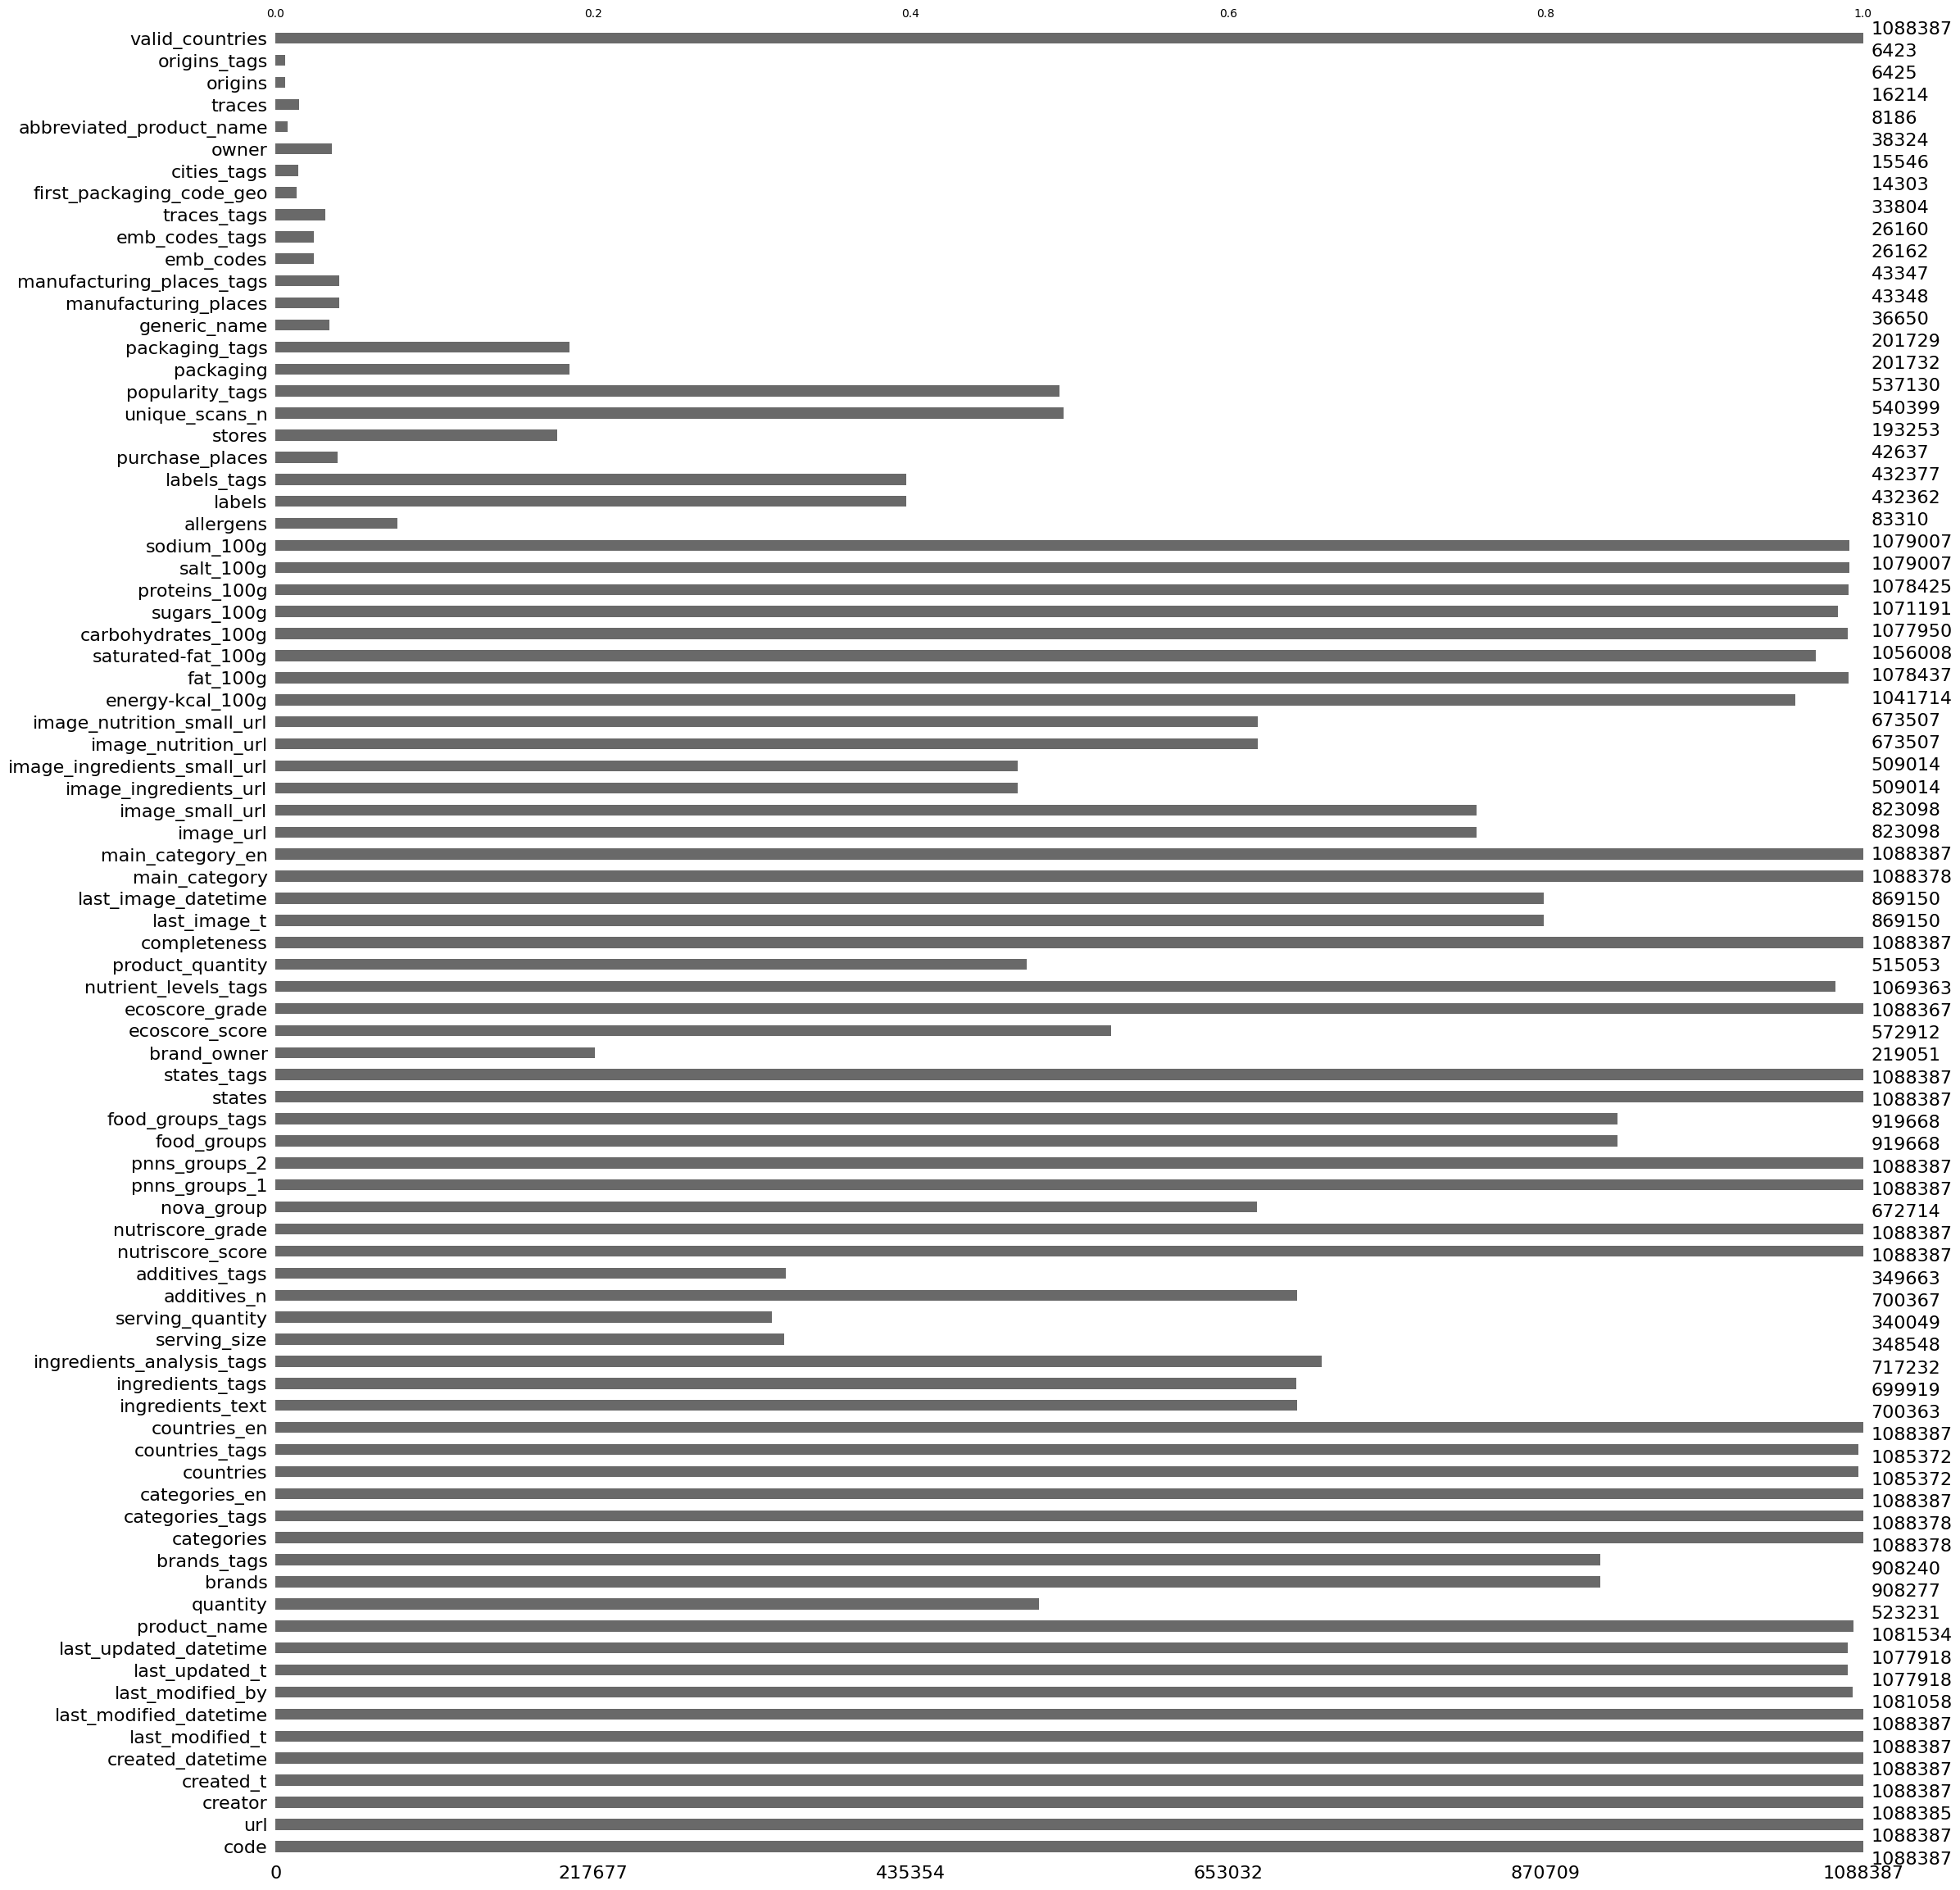

In [12]:
msno.bar(df)
plt.show()